# Goal
- refactor deep consensus wrapper and fit_generator
- import in notebook
- use notebook as template for colab notebook

In [12]:
%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%cd ..

/Users/gw/repos


In [14]:
rm -r __pycache__/

rm: __pycache__/: No such file or directory


In [15]:
from deep_consensus import deep_consensus_wrapper
#del(fit_generator_helper)
import fit_generator_helper
import mrc

# set up data

In [16]:
fname_list = ['/Users/gw/Documents/education/2018w/ece1512/project/P11/J75/simulated_particles.mrcs',
              '/Users/gw/Documents/education/2018w/ece1512/project/P11/J103/simulated_particles.mrcs']
label_list = [0,1]
df = fit_generator_helper.parse_files(fname_list,label_list)
df = df.sample(df.shape[0])
header = mrc.read_header(fname_list[0])
nx,ny=header['nx'],header['nx']
val_n = 2000
df = df.iloc[:-val_n]
df_val = df.iloc[-val_n:]

In [22]:
X_val,Y_val = fit_generator_helper.XY_from_df_batch(df_val,nx=nx,ny=ny,crop_n=128)


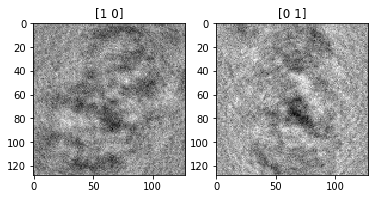

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
i,j = 0,2
a = fig.add_subplot(121)
a.set_title('%s' % Y[i])
plt.imshow(X[i,:,:,0],cmap='gray')

a = fig.add_subplot(122)
a.set_title('%s' % Y[j])
plt.imshow(X[j,:,:,0],cmap='gray')


# build model

In [9]:
model = deep_consensus_wrapper(input_shape=X.shape[1::],)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 8)       1808      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 8)       14408     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 8)       32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 8)         3144      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        6288      
__________

# train model

In [20]:
import numpy as np
batch_size = 25
steps_per_epoch = np.floor(df.shape[0] / batch_size) # 110 for 11k particles

In [ ]:
for _ in range(8):
    model.fit_generator(fit_generator_helper.image_loader(df,batch_size=batch_size,nx=nx,ny=ny,crop_n=128),
                    steps_per_epoch=steps_per_epoch, # steps_per_epoch is number of batches per epoch
                    epochs=1,
                    #use_multiprocessing=True,
                    #workers=5
                   )
    scores = model.evaluate(X_val, Y_val)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

Epoch 1/1
 89/720 [==>...........................] - ETA: 30:38 - loss: 0.8205 - categorical_accuracy: 0.5083

# tune dense layer

In [ ]:
for dense13_n in [64,128,256]:
    print(dense13_n)
    model_dense13_n = deep_consensus_wrapper(input_shape=X.shape[1::],dense13_n=dense13_n)
    for _ in range(3):
        model_dense13_n.fit_generator(fit_generator_helper.image_loader(df,batch_size=batch_size,nx=nx,ny=ny,crop_n=128),
                        steps_per_epoch=steps_per_epoch, # steps_per_epoch is number of batches per epoch
                        epochs=1,
                        #use_multiprocessing=True,
                        #workers=5
                       )
        scores = model_dense13_n.evaluate(X_val, Y_val)
        print("%s: %.2f%%" % (model_dense13_n.metrics_names[1], scores[1] * 100))
    
    